## Abraxas Test For Data Science Position
This code was made in order to predict sales by week nine for a specific product-agency-client.

Methodology:
    
    1.- Explore dataset in order to find if there is any null data or missing values.
    
    2.- Merge datasets to see how the relation is between the datasets
    
    3.- Decide which will be the client-agency-client combination
    
    4.- Use the test data set to train a model and predict the sales amount for week 9

Main libraries (basic libraries, not the ones that will be used for training the dataset and prediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datasets exploration for datac cleaning and missing values management

In [2]:
cliente = pd.read_csv('cliente_tabla.csv')
candidate_small = pd.read_csv('df_[candidate]_small.csv')
test_small = pd.read_csv('df_[test]_small.csv')
producto = pd.read_csv('producto_tabla.csv')
town_state = pd.read_csv('town_state_small.csv')
print(cliente.info(), '\n', '\n', candidate_small.info(), '\n', '\n', test_small.info()
      , '\n', '\n', producto.info(), '\n'
      , '\n', town_state.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935362 entries, 0 to 935361
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Cliente_ID     935362 non-null  int64 
 1   NombreCliente  935362 non-null  object
dtypes: int64(1), object(1)
memory usage: 14.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974418 entries, 0 to 7974417
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int64  
 1   Agencia_ID         int64  
 2   Canal_ID           int64  
 3   Ruta_SAK           int64  
 4   Cliente_ID         int64  
 5   Producto_ID        int64  
 6   Venta_uni_hoy      int64  
 7   Venta_hoy          float64
 8   Dev_uni_proxima    int64  
 9   Dev_proxima        float64
 10  Demanda_uni_equil  int64  
dtypes: float64(2), int64(9)
memory usage: 669.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337913 entries, 0 to 1337912
Da

As there are no missing values we can merge the datasets we'll be using for our methodologies

In [3]:
candidate_cliente = pd.merge(candidate_small,cliente, on = 'Cliente_ID', how = 'left')
candidate_c_p = pd.merge(candidate_cliente, producto, on = 'Producto_ID', how = 'left')
candidate_c_p_a = pd.merge(candidate_c_p,town_state, on ='Agencia_ID', how = 'left')
candidate_c_p_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8014944 entries, 0 to 8014943
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int64  
 1   Agencia_ID         int64  
 2   Canal_ID           int64  
 3   Ruta_SAK           int64  
 4   Cliente_ID         int64  
 5   Producto_ID        int64  
 6   Venta_uni_hoy      int64  
 7   Venta_hoy          float64
 8   Dev_uni_proxima    int64  
 9   Dev_proxima        float64
 10  Demanda_uni_equil  int64  
 11  NombreCliente      object 
 12  NombreProducto     object 
 13  Town               object 
 14  State              object 
dtypes: float64(2), int64(9), object(4)
memory usage: 978.4+ MB


In [4]:
candidate_c_p_a.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente,NombreProducto,Town,State
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,PUESTO DE PERIODICOS LAZARO,Roles Canela 2p 120g BIM 1212,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,PUESTO DE PERIODICOS LAZARO,Roles Glass 2p 135g BIM 1216,2008 AG. LAGO FILT,"MÉXICO, D.F."
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,PUESTO DE PERIODICOS LAZARO,Panquecito Gota Choc 2p 140g BIM 1238,2008 AG. LAGO FILT,"MÉXICO, D.F."
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,PUESTO DE PERIODICOS LAZARO,Mantecadas Vainilla 4p 125g BIM 1240,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,PUESTO DE PERIODICOS LAZARO,Donitas Espolvoreadas 6p 105g BIM 1242,2008 AG. LAGO FILT,"MÉXICO, D.F."


Statistic descriptions for every numerical feature in order to see if there are any outliers

In [5]:
candidate_c_p_a.describe().T

,count,mean,std,min,25%,50%,75%,max
Semana,8014944.0,5.446668e+00,1.735280e+00,3.0,4.00,5.00,7.0,8.0
Agencia_ID,8014944.0,1.126475e+03,1.244321e+01,1110.0,1118.00,1123.00,1130.0,1173.0
Canal_ID,8014944.0,1.272206e+00,1.044952e+00,1.0,1.00,1.00,1.0,11.0
Ruta_SAK,8014944.0,1.827148e+03,1.276554e+03,1.0,1201.00,1433.00,1625.0,9988.0
Cliente_ID,8014944.0,1.421324e+06,1.520989e+06,3967.0,322240.00,861188.00,2099456.0,99999999.0
Producto_ID,8014944.0,1.499454e+04,1.769155e+04,53.0,1220.00,2233.00,34212.0,49994.0
Venta_uni_hoy,8014944.0,7.559783e+00,2.225062e+01,0.0,2.00,4.00,7.0,4800.0
Venta_hoy,8014944.0,8.170079e+01,5.864316e+02,0.0,18.86,34.59,65.4,647360.0
Dev_uni_proxima,8014944.0,1.042098e-01,3.205180e+00,0.0,0.00,0.00,0.0,3360.0
Dev_proxima,8014944.0,1.206488e+00,2.825756e+01,0.0,0.00,0.00,0.0,49500.0


# General Sales time Graphic

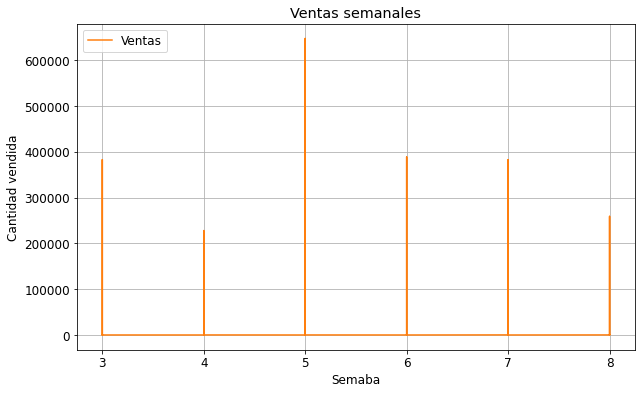

In [6]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(candidate_c_p_a.Semana, candidate_c_p_a.Venta_hoy, color='tab:orange', label='Ventas')

ax.set_xlabel('Semaba')
ax.set_ylabel('Cantidad vendida')
ax.set_title('Ventas semanales')
ax.grid(True)
ax.legend(loc='upper left');

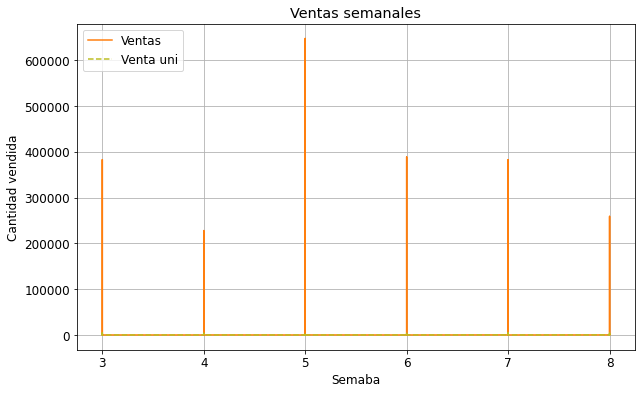

In [7]:
# Use linestyle keyword to style our plot
ax.plot(candidate_c_p_a.Semana, candidate_c_p_a.Venta_uni_hoy, color='tab:olive', linestyle='--',
        label='Venta uni')
# Redisplay the legend to show our new wind gust line
ax.legend(loc='upper left')

fig

# Ventas vs Ventas unitarias

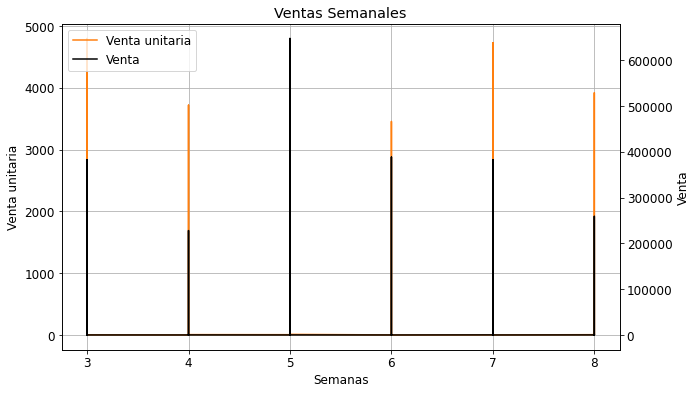

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Semanas')
ax.set_ylabel('Venta unitaria')
ax.set_title('Ventas Semanales')
ax.grid(True)

ax.plot(candidate_c_p_a.Semana, candidate_c_p_a.Venta_uni_hoy, color='tab:orange', label='Venta unitaria')

axb.set_ylabel('Venta')
axb.plot(candidate_c_p_a.Semana, candidate_c_p_a.Venta_hoy, color='black', label='Venta')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

Exploring which Agencies/Clients/Product has the bigger amount of data so the model will have a better prediction

In [9]:
print(pd.DataFrame(candidate_c_p_a.Agencia_ID.value_counts()).head(), '\n',
      pd.DataFrame(candidate_c_p_a.Producto_ID.value_counts()).head(),'\n',
      pd.DataFrame(candidate_c_p_a.Cliente_ID.value_counts()).head())

      Agencia_ID
1123      628521
1126      495889
1117      484264
1121      466461
1116      415783 
       Producto_ID
1278       271398
1250       266833
1240       245526
2233       245374
1284       228735 
          Cliente_ID
22730          1188
16618           950
195079          782
1404831         763
667868          762


In [10]:
# Just Numerical data
cols = candidate_c_p_a.select_dtypes([np.int64,np.float64]).columns
df = candidate_c_p_a[cols]
df.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


In [11]:
#Agency and Product selection
df_1 = df[df.Producto_ID == 1278]
df_1 = df_1[df_1.Agencia_ID == 1123]
df_1.reset_index(inplace = True)
df_1.drop(columns = ['index'], inplace =True)
df_1.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1123,1,1201,200819,1278,10,45.0,0,0.0,10
1,3,1123,1,1201,200918,1278,4,18.0,0,0.0,4
2,3,1123,1,1201,200942,1278,15,67.5,0,0.0,15
3,3,1123,1,1201,200955,1278,39,175.5,9,40.5,30
4,3,1123,1,1201,200981,1278,40,180.0,0,0.0,40


# Demanda and Venta behavior for classification

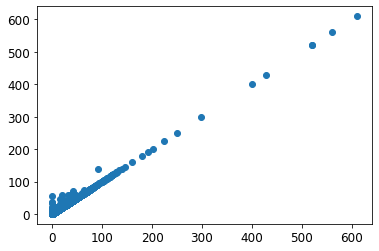

In [12]:
plt.scatter(df_1.Demanda_uni_equil, df_1.Venta_uni_hoy);

# Cluster
The decision was to split the dataset with a cluster because if you take just an specific client the data is reduce only to 12 rows of data and that's not enough data to train a model an make an accurate prediction

In [26]:
from sklearn.cluster import AgglomerativeClustering as AC
cluster=AC().fit(df_1)

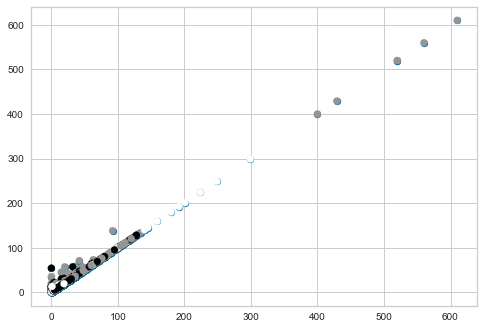

In [27]:
from sklearn.cluster import KMeans

plt.scatter(df_1.Demanda_uni_equil, df_1.Venta_uni_hoy,);
cluster=KMeans(n_clusters=3).fit(df_1)
plt.scatter(df_1.Demanda_uni_equil, df_1.Venta_uni_hoy,c=cluster.labels_);

# K-elbow graph for optimal Kmenas Clustering

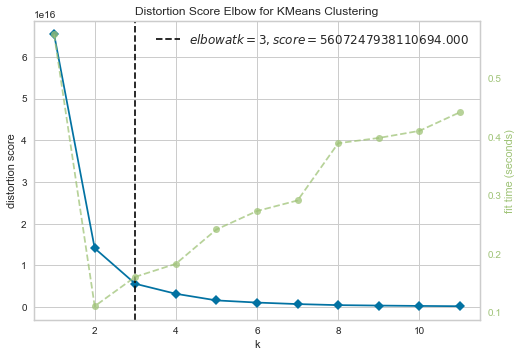

In [20]:
from yellowbrick.cluster import KElbowVisualizer

visual=KElbowVisualizer(cluster, k=(1, 12))
visual.fit(df_1)
visual.poof();

In [28]:
y = pd.DataFrame(cluster.labels_)
df_1[labels] = y
df_1.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Venta unitaria
0,3,1123,1,1201,200819,1278,10,45.0,0,0.0,10,1
1,3,1123,1,1201,200918,1278,4,18.0,0,0.0,4,1
2,3,1123,1,1201,200942,1278,15,67.5,0,0.0,15,1
3,3,1123,1,1201,200955,1278,39,175.5,9,40.5,30,1
4,3,1123,1,1201,200981,1278,40,180.0,0,0.0,40,1


In [44]:
venta_unitaria = df_1[df_1['Venta unitaria'] == 1]
id_cliente = list(pd.DataFrame(venta_unitaria.Cliente_ID.value_counts().head(50)).index)
train = venta_unitaria[venta_unitaria.Cliente_ID.isin(id_cliente)]
train.shape

(312, 12)